In [53]:
import csv
import sys
from dateutil.parser import parse

FILENAME = "out.csv"
FILTER = ""
dates = {}
with open(FILENAME,"r") as csvFile:
    inFile = csv.reader(csvFile,delimiter=',',quotechar='"')
    for row in inFile:
        user = row[3]
        date = parse(row[2]).date()
        if FILTER == "" or user == FILTER:
            if date in dates: dates[date] += 1
            else: dates[date] = 1

<IPython.core.display.Javascript object>


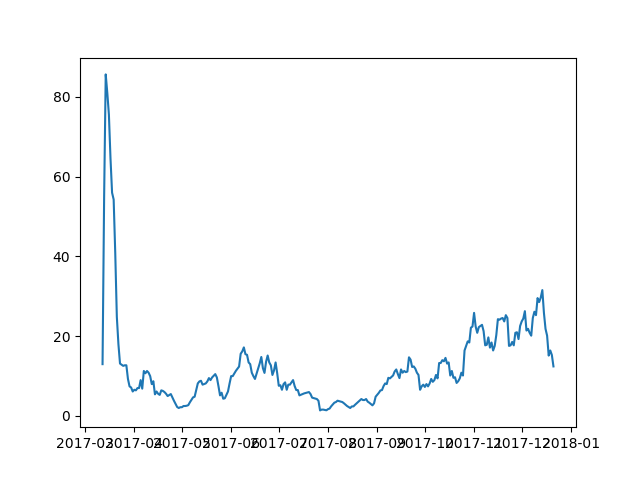

In [52]:
%matplotlib notebook
import matplotlib.pyplot as plt
import datetime

SMOOTH = 7

plt.figure()
x = []
y = []
for date in sorted(dates.keys()):
    total = dates[date]
    count = 1
    for i in range(1,SMOOTH):
        key = date-datetime.timedelta(days=i)
        if key in dates:
            total += dates[key]
            count += 1
    x.append(date)
    y.append(total/count)
plt.minorticks_off()
plt.plot(x,y)
plt.show()